# Basic Application of Series & DataFrame

This file will do an example analysis of a reasonably large dataset to learn more useful features of series and dataframe.

The data is from [NYC Open data](https://nycopendata.socrata.com/) (over 1200+ datasets available!) 

It contains all 311 complaints from November 1, 2014 until January 6, 2015. 
The data is in the file: 311_calls_2months.csv

I have deleted the dataset to only contains 5,000 rows

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# number of rows = 100,000 picking only the 100,000 for this dataframe to analyze

original_data = pd.read_csv('Pandas_1_data/311_calls_2months.csv',
                             nrows=5000,
                             dtype=unicode,
                             parse_dates=['Created Date'])


In [3]:
print original_data.columns.values

['Unnamed: 0' 'Unnamed: 0.1' 'Unnamed: 0.1.1' 'Unique Key' 'Created Date'
 'Closed Date' 'Agency' 'Agency Name' 'Complaint Type' 'Descriptor'
 'Location Type' 'Incident Zip' 'Incident Address' 'Street Name'
 'Cross Street 1' 'Cross Street 2' 'Intersection Street 1'
 'Intersection Street 2' 'Address Type' 'City' 'Landmark' 'Facility Type'
 'Status' 'Due Date' 'Resolution Action Updated Date' 'Community Board'
 'Borough' 'X Coordinate (State Plane)' 'Y Coordinate (State Plane)'
 'Park Facility Name' 'Park Borough' 'School Name' 'School Number'
 'School Region' 'School Code' 'School Phone Number' 'School Address'
 'School City' 'School State' 'School Zip' 'School Not Found'
 'School or Citywide Complaint' 'Vehicle Type' 'Taxi Company Borough'
 'Taxi Pick Up Location' 'Bridge Highway Name' 'Bridge Highway Direction'
 'Road Ramp' 'Bridge Highway Segment' 'Garage Lot Name' 'Ferry Direction'
 'Ferry Terminal Name' 'Latitude' 'Longitude' 'Location']


In [4]:
original_data.ix[0]

Unnamed: 0                                             0
Unnamed: 0.1                                           0
Unnamed: 0.1.1                                         0
Unique Key                                      29641524
Created Date                         2015-01-06 02:14:39
Closed Date                                          NaN
Agency                                             CHALL
Agency Name                                        CHALL
Complaint Type                     Opinion for the Mayor
Descriptor                                  PUBLICSAFETY
Location Type                                        NaN
Incident Zip                                         NaN
Incident Address                                     NaN
Street Name                                          NaN
Cross Street 1                                       NaN
Cross Street 2                                       NaN
Intersection Street 1                                NaN
Intersection Street 2          

## What do folks complain about?

In [5]:
# Complaint Type looks interesting
original_data['Complaint Type']

0         Opinion for the Mayor
1            Noise - Commercial
2                  Animal Abuse
3         Street Sign - Missing
4       Noise - Street/Sidewalk
5               Illegal Parking
6         Opinion for the Mayor
7         Street Sign - Missing
8            Consumer Complaint
9         Opinion for the Mayor
10             Blocked Driveway
11        Street Sign - Missing
12             Blocked Driveway
13           Food Establishment
14             Street Condition
15             Street Condition
16        Street Sign - Missing
17        Street Sign - Missing
18           Consumer Complaint
19        Street Sign - Missing
20           Noise - Commercial
21                     Graffiti
22        Opinion for the Mayor
23                       Rodent
24           Noise - Helicopter
25                 Animal Abuse
26        Opinion for the Mayor
27           Noise - Commercial
28                 Animal Abuse
29             Street Condition
                 ...           
4970    

## What do they complain about the most?

> dataframe['column1'].value_counts()
* value counts the type of value in a specific column

In [6]:
# Let us aggregate all the complaints and see the frequency of each complaint type
vc = original_data['Complaint Type'].value_counts()
vc[:10]

HEAT/HOT WATER              691
Street Light Condition      370
Blocked Driveway            251
Illegal Parking             207
Street Condition            196
Traffic Signal Condition    151
UNSANITARY CONDITION        142
Water System                140
DOF Literature Request      139
PAINT/PLASTER               111
Name: Complaint Type, dtype: int64

It's November, and New Yorkers really want their HOT WATER flowing.


## ... and the least?

In [7]:
vc[-10:]

DPR Literature Request            1
Invitation                        1
For Hire Vehicle Report           1
Boilers                           1
Sweeping/Inadequate               1
Taxi Compliment                   1
Window Guard                      1
DHS Income Savings Requirement    1
Beach/Pool/Sauna Complaint        1
Curb Condition                    1
Name: Complaint Type, dtype: int64

Let's use some plots to do some exploratory analysis

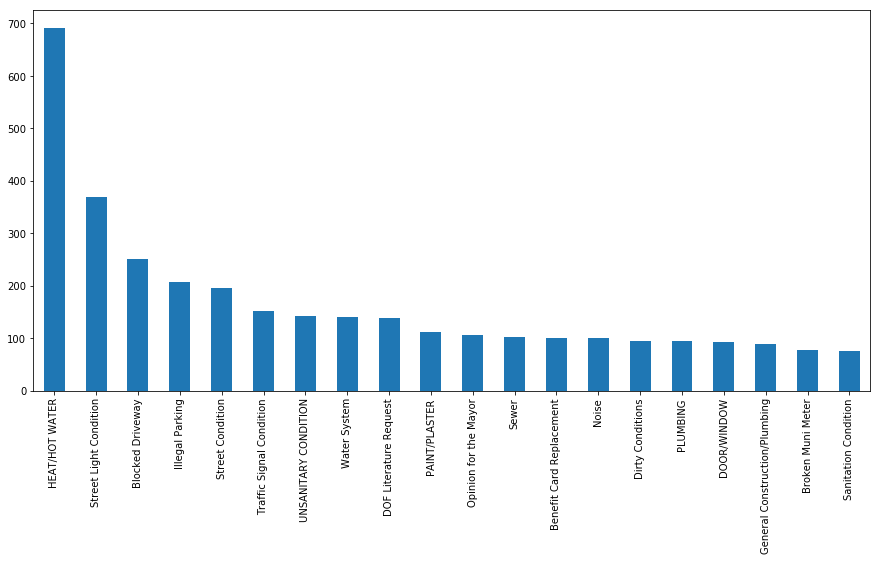

In [8]:
# Plot a histogram of the top-20 complaints.
plt.figure(figsize = (15,7))
top_20_vc = vc[:20]
top_20_vc.plot(kind='bar')

What if we want the y-axis to show the fraction of complaints, instead of the number of complaints?

We must **normalize** the value counts (vc) by the total number of complaints.

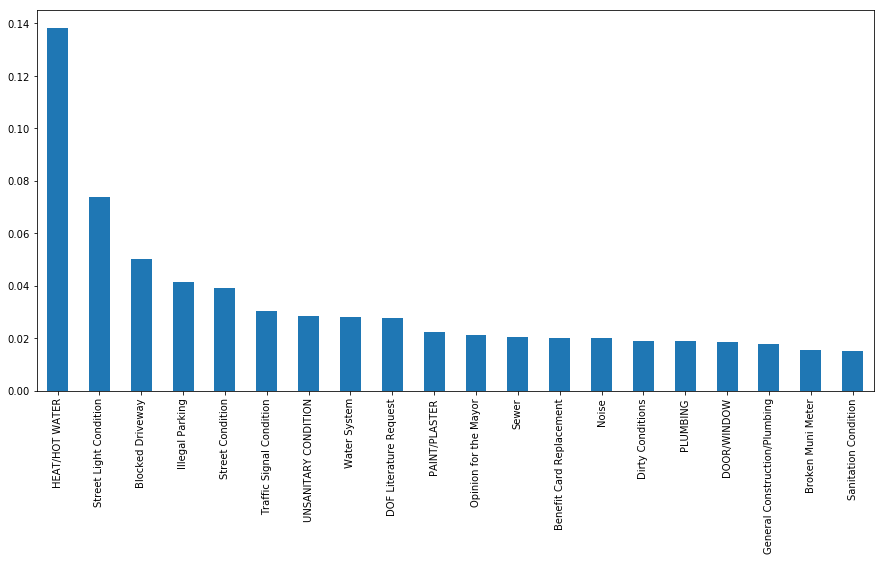

In [9]:
plt.figure(figsize = (15,7))
top_20_vc_fraction = top_20_vc / vc.sum()
top_20_vc_fraction.plot(kind='bar')

## Which locations complain the most?

We have the incident zipcode, and we have the borough. Let's look at these.

In [10]:
original_data['Borough'][:10]

0    Unspecified
1         QUEENS
2         QUEENS
3       BROOKLYN
4      MANHATTAN
5         QUEENS
6    Unspecified
7       BROOKLYN
8      MANHATTAN
9    Unspecified
Name: Borough, dtype: object

How do we plot the number of complaints for each Borough?

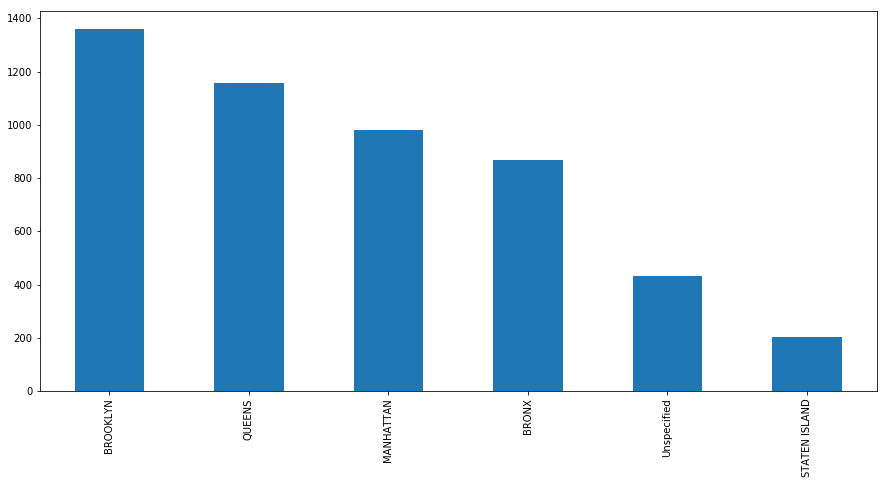

In [11]:
plt.figure(figsize = (15,7))
original_data['Borough'].value_counts().plot(kind='bar')

We are getting "Unspecified", but that's really a missing value. We should set missing values to NaN so that they are not counted.

> dataframe.**ix[mask, 'columnName']** = np.nan # This sets the value to NaN

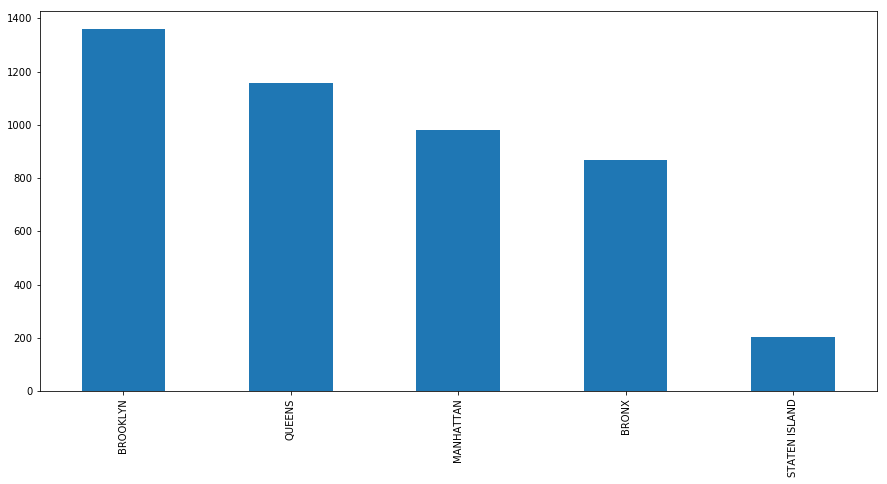

In [12]:
mask = (original_data['Borough'] == 'Unspecified')
original_data.ix[mask, 'Borough'] = np.nan # This sets the value to NaN

# Let's redo the bar plot
plt.figure(figsize = (15,7))
original_data['Borough'].value_counts().plot(kind='bar')

Let's do the same by zipcode.

In [13]:
original_data['Incident Zip'][:10]

0      NaN
1    11372
2    11416
3    11233
4    10022
5    11368
6      NaN
7    11233
8    10033
9      NaN
Name: Incident Zip, dtype: object

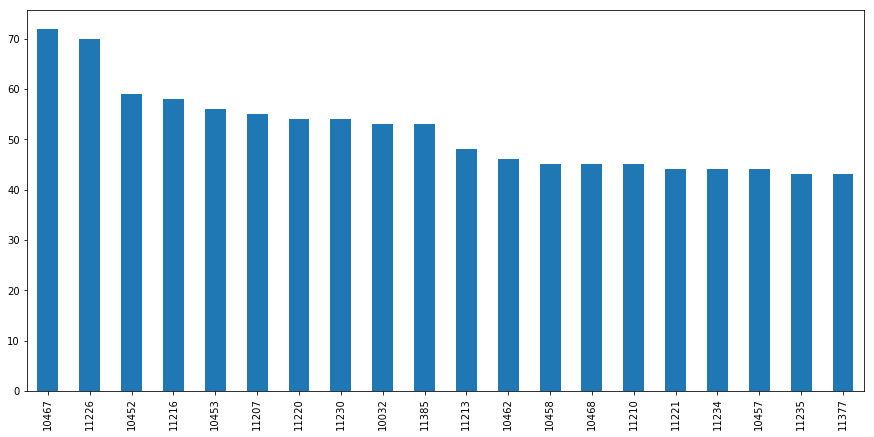

In [14]:
plt.figure(figsize = (15,7))
# Number of complaints by zipcode
original_data['Incident Zip'].value_counts()[:20].plot(kind='bar')

## Find the Borough for each zip-code

Let's do something a bit more complex. We have the top zip-codes, but that gives little understanding. Let us find the Borough for each zipcode.

How do we do this?

We want to create a **Series** of Borough indexed by zipcode.
In this Series, we must have:

* for each zipcode, there should be one borough, and
* there should be no duplicate zipcodes in the index.

In [15]:
# Step 2: Get a Series of Boroughs, again indexed by zipcode
borough_zip = original_data[['Borough', 'Incident Zip']]
borough_zip[:5]

,Borough,Incident Zip
0,NaN,NaN
1,QUEENS,11372
2,QUEENS,11416
3,BROOKLYN,11233
4,MANHATTAN,10022


### Trouble: both have missing values, and we must get rid of these.

#### 1st method: Get rid of the null in both column using two mask

In [16]:
# Detect missing boroughs
mask_borough = borough_zip['Borough'].notnull()
mask_borough[:5]

0    False
1     True
2     True
3     True
4     True
Name: Borough, dtype: bool

In [17]:
# Similarly, we get a mask for the non-null zipcodes
mask_zip = borough_zip['Incident Zip'].notnull()

Which are the rows we want to keep?

In [18]:
# We combine the two masks
mask = (mask_borough & mask_zip)  # mask is True only if both mask_borough and mask_zip are True

In [19]:
# Apply the mask
borough_zip_clean = borough_zip[mask]
borough_zip_clean[:5]

,Borough,Incident Zip
1,QUEENS,11372
2,QUEENS,11416
3,BROOKLYN,11233
4,MANHATTAN,10022
5,QUEENS,11368


#### 2rd method: Get rid of the null in both column using *dropna()*

> dataframe.dropna(how='any')

In [20]:
borough_zip_clean = borough_zip.dropna(how='any')
borough_zip_clean[:5]

,Borough,Incident Zip
1,QUEENS,11372
2,QUEENS,11416
3,BROOKLYN,11233
4,MANHATTAN,10022
5,QUEENS,11368


We have a DataFrame of Borough and zipcode with no missing values. However this has two problems:

* The (Borough, Incident Zip) pairs could be repeated multiple times.
* Some zipcodes could span multiple Boroughs (!)

We need to get rid of these **duplicates**.

In [21]:
borough_zip_dedup = borough_zip_clean.drop_duplicates(subset='Incident Zip')

print "Initial length of DataFrame =", len(borough_zip_clean)
print "After removing duplicates, length =", len(borough_zip_dedup)

Initial length of DataFrame = 4157
After removing duplicates, length = 176


> DataFrame.drop_duplicates()
* By default, it removes duplicate rows
* So if **(Queens, 11372)** is repeated multiple times, only one such row remains.

> DataFrame.drop_duplicates(subset='Incident Zip')

* This means we want Pandas to use only the zip-code while determining duplicates
* instead of both Borough and zip-code

* For any zip-code, only one **(Borough, Incident Zip)** row will be retained

We now have a good DataFrame of unique (Zipcodes, Borough) pairs.

In [22]:
borough_zip_dedup[:5]

,Borough,Incident Zip
1,QUEENS,11372
2,QUEENS,11416
3,BROOKLYN,11233
4,MANHATTAN,10022
5,QUEENS,11368


However, we need to create a **Series** with the zipcode as index.

In [23]:
tmp_df = borough_zip_dedup.set_index('Incident Zip')
tmp_df[:5]

,Borough
Incident Zip,
11372,QUEENS
11416,QUEENS
11233,BROOKLYN
10022,MANHATTAN
11368,QUEENS


In [24]:
# Recall that each column of a DataFrame is a Series.
borough_zip_series = tmp_df['Borough']
borough_zip_series[:5]

Incident Zip
11372       QUEENS
11416       QUEENS
11233     BROOKLYN
10022    MANHATTAN
11368       QUEENS
Name: Borough, dtype: object

### Summary (find the Borough for each zip-code)

We wanted to get a Series of Boroughs, indexed by Zipcode.

* We selected zipcodes and boroughs from the full data

> borough_zip = orig_data[['Borough', 'Incident Zip']]

* We removed missing values by applying a mask.
    * there is also a dropna() method which does what we did

* We removed duplicates
    * drop_duplicates() method

* We set the zipcode to be the index
    * set_index() method

* Finally, we selected the 'Borough' Series, now indexed by zipcode.

## Plot the most _interesting_ zip-codes

Let us again plot the number of incidents by zip-code, but with the zip-code labels replaced by the corresponding Boroughs.

How do we do this?

1. Get the number of complaints by zipcode. This gives a Series, indexed by zipcode.
2. Get a Series of Boroughs, again indexed by zipcode.
3. **Rename** the index of the first series using the Series of Step 2.

**Step 1:** Get the number of complaints by zipcode.

In [25]:
# Step 1: Get the number of complaints by zipcode.
vc = original_data['Incident Zip'].value_counts()
vc[:5]

10467    72
11226    70
10452    59
11216    58
10453    56
Name: Incident Zip, dtype: int64

**Step 2:** Get a Series of Boroughs, indexed by zipcode.

In [26]:
borough_zip_series[:5]

Incident Zip
11372       QUEENS
11416       QUEENS
11233     BROOKLYN
10022    MANHATTAN
11368       QUEENS
Name: Borough, dtype: object

**Step 3:** Replace the index of the value-counts Series (vc) by the corresponding Borough from borough_zip_series.

In [27]:
# Step 3: Replace index of vc with borough_zip_series
vc_renamed = vc.rename(borough_zip_series)
vc_renamed[:5]

BRONX       72
BROOKLYN    70
BRONX       59
BROOKLYN    58
BRONX       56
Name: Incident Zip, dtype: int64

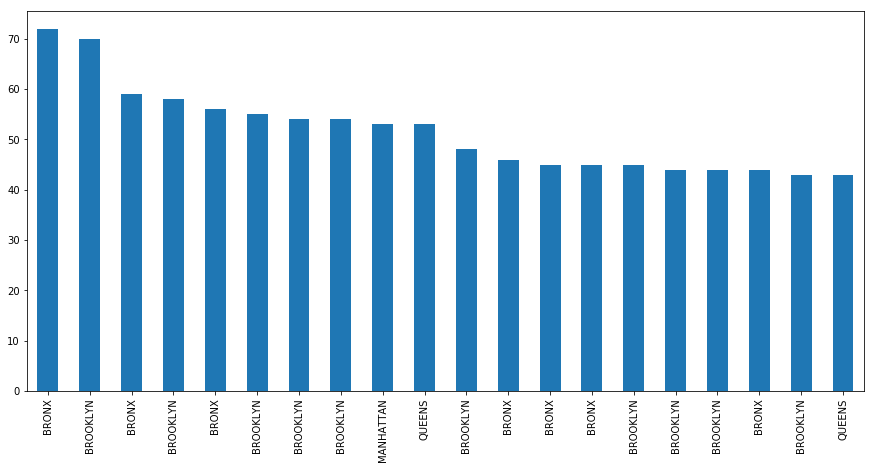

In [28]:
# Finally, let us re-plot the value counts by zip-code, but with the Borough name as the label
plt.figure(figsize(15,7))
vc_renamed[:20].plot(kind='bar')

* **Surprise!** The top-complaining zipcodes seem to be mostly from the Bronx, but we'd earlier seen that Brooklyn complains the most?

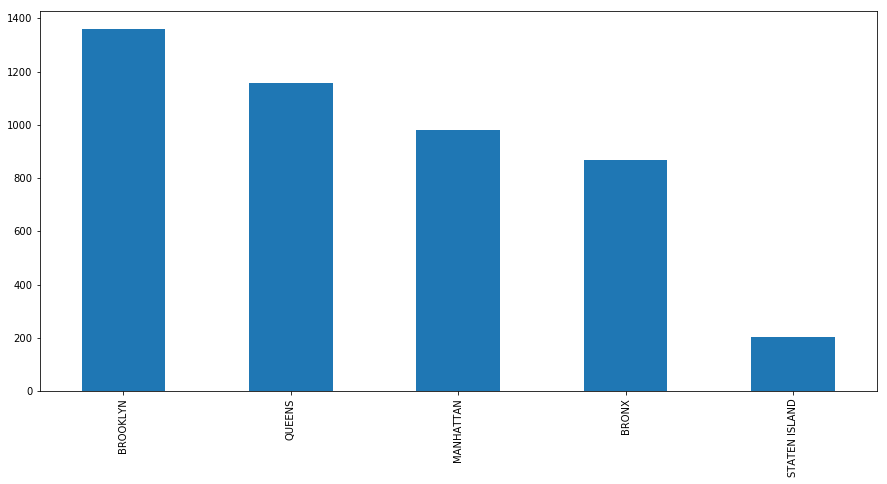

In [29]:
plt.figure(figsize(15,7))
original_data['Borough'].value_counts().plot(kind='bar')

**Why?** Maybe Brooklyn just has more zipcodes?

## Find the number of zipcodes for each Borough.

How would we solve this?

In [30]:
zip_per_borough = original_data[['Borough', 'Incident Zip']].dropna(how='any') \
                                                        .drop_duplicates() \
                                                        ['Borough'] \
                                                        .value_counts()
zip_per_borough

QUEENS           58
MANHATTAN        44
BROOKLYN         38
BRONX            25
STATEN ISLAND    12
Name: Borough, dtype: int64

So, it isn't the case that Brooklyn has far more zipcodes than everyone else... Still, it has quite a few more than the Bronx.

## Plot complaints per zipcode for each Borough.

In [31]:
# We have the borough, zipcode DataFrame with null values removed.
# Each row corresponds to one complaint.
borough_zip_clean[:5]

,Borough,Incident Zip
1,QUEENS,11372
2,QUEENS,11416
3,BROOKLYN,11233
4,MANHATTAN,10022
5,QUEENS,11368


In [32]:
# Get the number of complaints by borough
borough_counts = borough_zip_clean['Borough'].value_counts()
borough_counts

BROOKLYN         1275
QUEENS           1087
MANHATTAN         826
BRONX             786
STATEN ISLAND     183
Name: Borough, dtype: int64

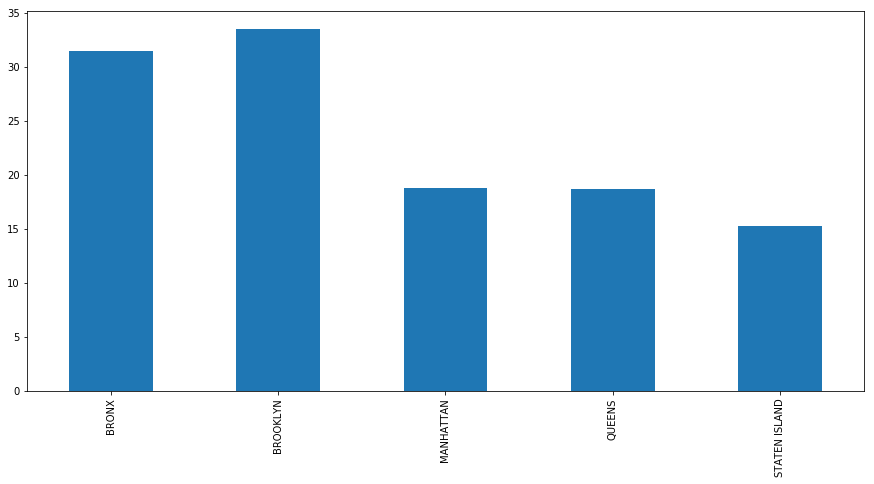

In [33]:
# Divide this by zip_per_borough, and plot.
plt.figure(figsize(15,7))
borough_counts_per_zip = borough_counts / zip_per_borough
borough_counts_per_zip.plot(kind='bar')

## I'm going to NYC and I hate noise. Which streets should I avoid?

Let us now focus on one particular kind of complaint: Noise complaints.
How do we find all types of noise-related complaints?

In [34]:
original_data['Complaint Type'].unique()  # Get all types of complaints

array(['Opinion for the Mayor', 'Noise - Commercial', 'Animal Abuse',
       'Street Sign - Missing', 'Noise - Street/Sidewalk',
       'Illegal Parking', 'Consumer Complaint', 'Blocked Driveway',
       'Food Establishment', 'Street Condition', 'Graffiti', 'Rodent',
       'Noise - Helicopter', 'Homeless Person Assistance', 'Complaint',
       'Street Light Condition', 'Noise - Vehicle',
       'Overgrown Tree/Branches', 'Traffic Signal Condition',
       'Found Property', 'Benefit Card Replacement', 'PLUMBING',
       'HEAT/HOT WATER', 'UNSANITARY CONDITION', 'PAINT/PLASTER',
       'WATER LEAK', 'FLOORING/STAIRS', 'Sewer', 'Water System', 'Noise',
       'Request for Information', 'Dirty Conditions',
       'DCA / DOH New License Application Request', 'Highway Condition',
       'SCRIE', 'Missed Collection (All Materials)', 'Snow',
       'Agency Issues', 'Non-Residential Heat', 'Vending',
       'Derelict Vehicle', 'Other Enforcement', 'Litter Basket / Request',
       'Derelict Ve

How do we find the noisiest streets?

1. Create a function that checks if the complaint type contains 'Noise'
    * How?
2. Select all noise-related complaints
    * Build a mask using the function of Step 1
3. Pick the streets that occur most frequently
    * value_counts()

**Step 1:** Create a function that checks if the complaint type contains 'Noise'.

In [35]:
# Side note: Pandas actually has functions to do regular expressions easily,
#           but we won't get into that here.
import re
def noisy(s):
    """Given a Complaint Type string, return True if it is
       a noise-related complaint."""
    return (len(re.findall('Noise', s)) > 0)

# Test
print noisy('Noise - Commercial')
print noisy('ELEVATOR')

True
False


**Step 2:** Build a mask using this function.

In [36]:
noise_mask = original_data['Complaint Type'].map(noisy)

We have the mask that is True if the Complaint is noise-related; now we select those rows.

In [37]:
noise_complaints = original_data[noise_mask]
noise_complaints[:5]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
1,1,1,1,29636054,2015-01-06 02:09:30,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.74642854264474,-73.89533997952648,"(40.74642854264474, -73.89533997952648)"
4,4,4,4,29641040,2015-01-06 02:03:11,01/06/2015 02:36:38 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.76049674396275,-73.96604690111288,"(40.76049674396275, -73.96604690111288)"
20,20,20,20,29639511,2015-01-06 01:32:51,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.74642854264474,-73.89533997952648,"(40.74642854264474, -73.89533997952648)"
24,24,24,24,29641827,2015-01-06 01:27:24,NaN,EDC,Economic Development Corporation,Noise - Helicopter,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.864212983761796,-73.92753738525039,"(40.864212983761796, -73.92753738525039)"
27,27,27,27,29638620,2015-01-06 01:24:16,01/06/2015 02:19:00 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.74173312459783,-74.00308183921501,"(40.74173312459783, -74.00308183921501)"


**Step 3:** Pick the streets that occur most frequently.

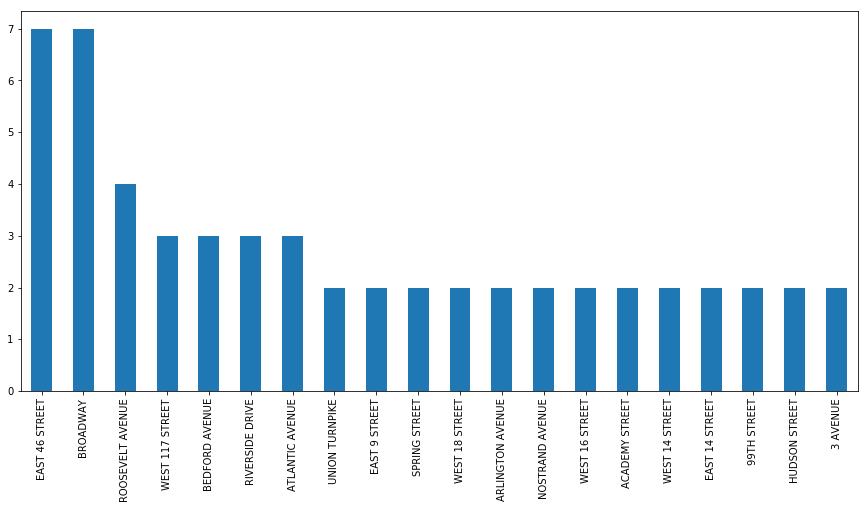

In [38]:
# Which streets have the most noise complaints?
plt.figure(figsize(15,7))
noise_vc = noise_complaints['Street Name'].value_counts()
noise_vc[:20].plot(kind='bar')

Sweet.

No problems, right?

**Are we sure there's only one "3 AVENUE"?**

In [39]:
noise_complaints[noise_complaints['Street Name'] == '3 AVENUE']['Borough'].value_counts()

MANHATTAN    2
Name: Borough, dtype: int64

There is a "3 AVENUE" in Manhattan, Brooklyn, and the Bronx. To find the noisy streets, we need to differentiate between these.

What do we do?

1. Create a new column 'Street & Borough', which will look like '3AVENUE (MANHATTAN)'
2. We will do value_counts() on this 'Street & Borough' column.

In [40]:
# Step 1: Create the new column
noise_complaints_copy = noise_complaints.copy()
noise_complaints_copy['Street & Borough'] = noise_complaints['Street Name'] + \
                                            ' (' + noise_complaints['Borough'] + ')'
noise_complaints_copy['Street & Borough'][:5]

1      ROOSEVELT AVENUE (QUEENS)
4     EAST 58 STREET (MANHATTAN)
20     ROOSEVELT AVENUE (QUEENS)
24     THAYER STREET (MANHATTAN)
27    WEST 16 STREET (MANHATTAN)
Name: Street & Borough, dtype: object

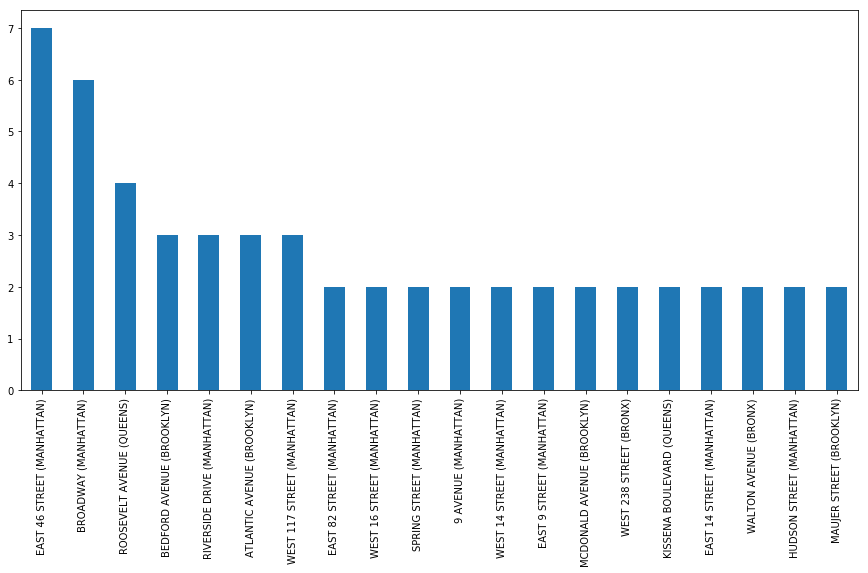

In [41]:
# Now we can do value_counts
plt.figure(figsize(15,7))
noise_complaints_copy['Street & Borough'].value_counts()[:20].plot(kind='bar')

**Avoid noisy Manhattan streets!**

## Summary

We saw several common use cases:

* Find the most common or most uncommon items in a Series
    * _value\_counts()_
* Deal with missing data
    * _dropna()_
    * or just create masks with _isnull()_ and _notnull()_
* Deal with duplicates
    * _drop\_duplicates()_
* Operate on rows rather than columns
    * _DataFrame.T_  
    * (stands for _transpose_)
* Plotting
    * _plot(kind="bar")_